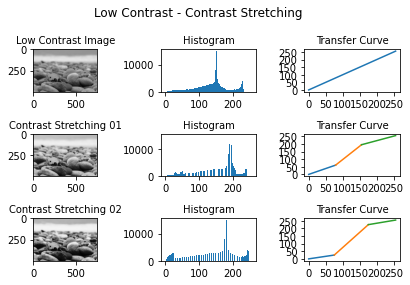

In [2]:
# Contrast Stretching - Low Contrast

import cv2
import numpy as np
import matplotlib.pyplot as plt

# 讀入圖片
img_l = cv2.imread('low_contrast.jpg', 0)
# 調整圖片大小
img_l = cv2.resize(img_l, None, fx = 0.5, fy = 0.5)
img_l_adjust = img_l.copy()

row, col = img_l.shape

# 定義contrast stretching轉換函數，傳入兩個點的座標
def contrastSretching(p1, p2):
    
    # 初始化影像
    img_l_adjust = img_l.copy()
    
    # 將圖片進行分段函數變換
    for i in range (0,row):
        for j in range (0,col):
            # 第一段
            if img_l_adjust[i,j] < p1[0]:
                # 第一段的轉換公式
                img_l_adjust[i,j]=  p1[1]/p1[0] * img_l_adjust[i,j]
            # 第二段
            elif img_l_adjust[i,j] >= p1[0] and img_l_adjust[i,j] < p2[0]:
                # 第二段的轉換公式
                img_l_adjust[i,j] = (p2[1] - p1[1]) / (p2[0] - p1[0]) * img_l_adjust[i,j] + p2[1] - ( p2[0] * (p2[1] - p1[1]) / (p2[0] - p1[0] + 1))
            # 第三段
            elif img_l_adjust[i,j] >= p2[0]:
                # 第三段的轉換公式
                img_l_adjust[i,j] = (255 - p2[1])/(255 - p2[0]) * img_l_adjust[i,j] + 255 * (1 - ((255 - p2[1])/(255 - p2[0])))
    return img_l_adjust


# 決定繪製子圖表的個數
plot_row = 3
plot_col = 3

# 設定子圖表
plt.subplot(plot_row, plot_col, 1)
plt.title('Low Contrast Image', fontsize = 10)
plt.imshow(cv2.cvtColor(img_l, cv2.COLOR_GRAY2RGB))

plt.subplot(plot_row, plot_col,2)
plt.title('Histogram', fontsize = 10)
plt.hist(img_l.ravel(),256,[0,256])
plt.xticks([0,100, 200])

plt.subplot(plot_row, plot_col,3)
plt.title('Transfer Curve', fontsize = 10)
x = np.linspace(0,255)
y = x
plt.plot(x, y)
plt.yticks([0, 50, 100, 150, 200, 250])
plt.xticks([0, 50, 100, 150, 200, 250])

p1 = [79, 61] 
p2 = [155, 195]

img_con_1 = contrastSretching(p1,p2)
plt.subplot(plot_row, plot_col,4)
plt.title('Contrast Stretching 01', fontsize = 10)
plt.imshow(cv2.cvtColor(img_con_1, cv2.COLOR_GRAY2RGB))

plt.subplot(plot_row, plot_col,5)
plt.title('Histogram', fontsize = 10)
plt.hist(img_con_1.ravel(),256,[0,256])

plt.subplot(plot_row, plot_col,6)
plt.title('Transfer Curve', fontsize = 10)
x1 = np.linspace(0,p1[0])
x2 = np.linspace(p1[0],p2[0])
x3 = np.linspace(p2[0],255)
y1 = p1[1]/p1[0] * x1
y2 = (p2[1] - p1[1]) / (p2[0] - p1[0]) * x2 + p2[1] - ( p2[0] * (p2[1] - p1[1]) / (p2[0] - p1[0]))
y3 = (255 - p2[1])/(255 - p2[0]) * x3 + 255 * (1 - ((255 - p2[1])/(255 - p2[0])))
plt.plot(x1, y1, markersize=20)
plt.plot(x2, y2, markersize=20)
plt.plot(x3, y3, markersize=20)

plt.yticks([0, 50, 100, 150, 200, 250])
plt.xticks([0, 50, 100, 150, 200, 250])


p1 = [75, 25] 
p2 = [175, 225]

img_con_2 = contrastSretching(p1,p2)

plt.subplot(plot_row, plot_col,7)
plt.title('Contrast Stretching 02', fontsize = 10)
plt.imshow(cv2.cvtColor(img_con_2, cv2.COLOR_GRAY2RGB))

plt.subplot(plot_row, plot_col,8)
plt.title('Histogram', fontsize = 10)
plt.hist(img_con_2.ravel(),256,[0,256])

plt.subplot(plot_row, plot_col,9)
plt.title('Transfer Curve', fontsize = 10)
x1 = np.linspace(0,p1[0])
x2 = np.linspace(p1[0],p2[0])
x3 = np.linspace(p2[0],255)
y1 = p1[1]/p1[0] * x1
y2 = (p2[1] - p1[1]) / (p2[0] - p1[0]) * x2 + p2[1] - ( p2[0] * (p2[1] - p1[1]) / (p2[0] - p1[0]))
y3 = (255 - p2[1])/(255 - p2[0]) * x3 + 255 * (1 - ((255 - p2[1])/(255 - p2[0])))
plt.plot(x1, y1, markersize=20)
plt.plot(x2, y2, markersize=20)
plt.plot(x3, y3, markersize=20)
plt.yticks([0, 50, 100, 150, 200, 250])
plt.xticks([0, 50, 100, 150, 200, 250])

plt.suptitle('Low Contrast - Contrast Stretching')
plt.tight_layout()
plt.savefig('./low_contrast/low_contrast_out.jpg', dpi = 500)

cv2.imwrite('./low_contrast/low_contrast_gray.jpg', img_l)
cv2.imwrite('./low_contrast/low_contrast_contrast_stretching_01.jpg', cv2.cvtColor(img_con_1, cv2.COLOR_GRAY2BGR))
cv2.imwrite('./low_contrast/low_contrast_contrast_stretching_02.jpg', cv2.cvtColor(img_con_2, cv2.COLOR_GRAY2BGR))

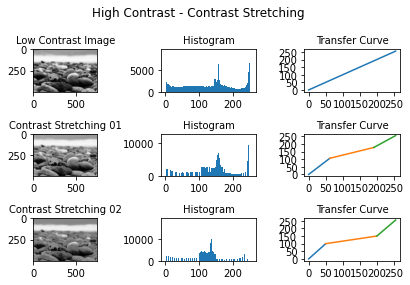

In [3]:
# Contrast Stretching - High Contrast

import cv2
import numpy as np
import matplotlib.pyplot as plt

img_h = cv2.imread('high_contrast.jpg', 0)
img_h = cv2.resize(img_h, None, fx = 0.5, fy = 0.5)
img_h_adjust = img_h.copy()

row, col = img_h.shape

def contrastSretching(p1, p2):
    img_h_adjust = img_h.copy()
    for i in range (0,row):
        for j in range (0,col):
            if img_h_adjust[i,j] < p1[0]:
                img_h_adjust[i,j] =  p1[1]/(p1[0]+1) * img_h_adjust[i,j]
            elif img_h_adjust[i,j] >= p1[0] and img_h_adjust[i,j] < p2[0]:
                img_h_adjust[i,j] = (p2[1] - p1[1]) / (p2[0] - p1[0]) * img_h_adjust[i,j] + p2[1] - ( p2[0] * (p2[1] - p1[1]) / (p2[0] - p1[0]))
            elif img_h_adjust[i,j] >= p2[0]:
                img_h_adjust[i,j] = (256 - p2[1])/(256 - p2[0]) * img_h_adjust[i,j] + 256 * (1 - ((256 - p2[1])/(256 - p2[0])))  
    return img_h_adjust 

plot_row = 3
plot_col = 3

plt.subplot(plot_row, plot_col, 1)
plt.title('Low Contrast Image', fontsize = 10)
plt.imshow(cv2.cvtColor(img_h, cv2.COLOR_GRAY2RGB))

plt.subplot(plot_row, plot_col,2)
plt.title('Histogram', fontsize = 10)
plt.hist(img_h.ravel(),256,[0,256])
plt.xticks([0,100, 200])

plt.subplot(plot_row, plot_col,3)
plt.title('Transfer Curve', fontsize = 10)
x = np.linspace(0,255)
y = x
plt.plot(x, y)
plt.yticks([0, 50, 100, 150, 200, 250])
plt.xticks([0, 50, 100, 150, 200, 250])

p1 = [62, 106]
p2 = [191, 177]

img_con_1 = contrastSretching(p1,p2)
plt.subplot(plot_row, plot_col,4)
plt.title('Contrast Stretching 01', fontsize = 10)
plt.imshow(cv2.cvtColor(img_con_1, cv2.COLOR_GRAY2RGB))

plt.subplot(plot_row, plot_col,5)
plt.title('Histogram', fontsize = 10)
plt.hist(img_con_1.ravel(),256,[0,256])

plt.subplot(plot_row, plot_col,6)
x1 = np.linspace(0,p1[0])
x2 = np.linspace(p1[0],p2[0])
x3 = np.linspace(p2[0],255)
y1 = p1[1]/p1[0] * x1
y2 = (p2[1] - p1[1]) / (p2[0] - p1[0]) * x2 + p2[1] - ( p2[0] * (p2[1] - p1[1]) / (p2[0] - p1[0]))
y3 = (255 - p2[1])/(255 - p2[0]) * x3 + 255 * (1 - ((255 - p2[1])/(255 - p2[0])))
plt.title('Transfer Curve', fontsize = 10)
plt.plot(x1, y1, markersize=20)
plt.plot(x2, y2, markersize=20)
plt.plot(x3, y3, markersize=20)

plt.yticks([0, 50, 100, 150, 200, 250])
plt.xticks([0, 50, 100, 150, 200, 250])


p1 = [50, 100] 
p2 = [200, 150]

img_con_2 = contrastSretching(p1,p2)

plt.subplot(plot_row, plot_col,7)
plt.title('Contrast Stretching 02', fontsize = 10)
plt.imshow(cv2.cvtColor(img_con_2, cv2.COLOR_GRAY2RGB))

plt.subplot(plot_row, plot_col,8)
plt.title('Histogram', fontsize = 10)
plt.hist(img_con_2.ravel(),256,[0,256])

plt.subplot(plot_row, plot_col,9)
x1 = np.linspace(0,p1[0])
x2 = np.linspace(p1[0],p2[0])
x3 = np.linspace(p2[0],255)
y1 = p1[1]/p1[0] * x1
y2 = (p2[1] - p1[1]) / (p2[0] - p1[0]) * x2 + p2[1] - ( p2[0] * (p2[1] - p1[1]) / (p2[0] - p1[0]))
y3 = (255 - p2[1])/(255 - p2[0]) * x3 + 255 * (1 - ((255 - p2[1])/(255 - p2[0])))
plt.title('Transfer Curve', fontsize = 10)
plt.plot(x1, y1, markersize=20)
plt.plot(x2, y2, markersize=20)
plt.plot(x3, y3, markersize=20)

plt.yticks([0, 50, 100, 150, 200, 250])
plt.xticks([0, 50, 100, 150, 200, 250])

plt.suptitle('High Contrast - Contrast Stretching')
plt.tight_layout()
plt.savefig('./high_contrast/high_contrast_out.jpg', dpi = 500)

cv2.imwrite('./high_contrast/high_contrast_gray.jpg', img_h)
cv2.imwrite('./high_contrast/high_contrast_contrast_stretching_01.jpg', cv2.cvtColor(img_con_1, cv2.COLOR_GRAY2BGR))
cv2.imwrite('./high_contrast/high_contrast_contrast_stretching_02.jpg', cv2.cvtColor(img_con_2, cv2.COLOR_GRAY2BGR))